In [1]:
!pip install awscli
!pip install s3fs
!pip install boto3

# Configuration aws pour charger les donnees depuis le cloud
!aws configure

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 72.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 20.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for PyYAML: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=45658 sha256=d960048929eee863c1f1d5a1dce0c58e20a93d97b72f9d6d868eea145506266f
  Stored in directory: /root/.cache/pip/wheels/c7/0d/22/696ee92245ad710f506eee79bb05c740d8abccd3ecdb778683
Successfully built PyYAML
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Succ

In [2]:
# Importation des donnees
import pandas as pd
import numpy as np
path='s3://msprfinale/'

election = pd.read_csv(path+"Election_Securite.csv")
election = election.loc[:, ['% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprimés', '% Exp/Ins', '% Exp/Vot',"Nom","code"]]
election.rename(columns={'code':'code departement'}, inplace=True)
election['code departement']= election['code departement'].astype(str)
election

,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Nom,code departement
0,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
1,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
2,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
3,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
4,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2
7892,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2
7893,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2
7894,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2


In [3]:
emploi = pd.read_csv(path+"Emploi.csv")
emploi

,code departement,ABCDE_H,ABCDE_F,ABCDE,ABC_FR,ABC_E,ABC_2649,ABC_DUR2,ABC_25,A_F
0,01,196,199,395,245.0,107.0,235.0,66.0,55.0,90.0
1,01,214,196,410,264.0,111.0,234.0,74.0,68.0,91.0
2,01,235,208,443,264.0,127.0,253.0,70.0,59.0,116.0
3,01,302,292,594,445.0,88.0,301.0,85.0,106.0,144.0
4,01,308,302,610,441.0,89.0,306.0,102.0,105.0,135.0
...,...,...,...,...,...,...,...,...,...,...
2316,97,10522,10642,21164,19067.0,226.0,11272.0,2898.0,2722.0,7406.0
2317,97,10697,10903,21600,19752.0,256.0,11917.0,3122.0,2931.0,7772.0
2318,97,13248,14194,27442,23447.0,1437.0,14245.0,3540.0,3622.0,10145.0
2319,97,13400,14353,27753,23510.0,1497.0,14193.0,3451.0,3664.0,10054.0


In [4]:
election

,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Nom,code departement
0,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
1,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
2,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
3,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
4,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2
7892,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2
7893,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2
7894,8.81,321,91.19,10,2.84,3.12,4,1.14,1.25,307,87.22,95.64,LASSALLE,2


In [5]:
education = pd.read_csv(path+"Education.csv")
education

,code departement,EC_MAT,EC_ELEM,COLL,LYC,CFA
0,01,0,3,1,1,0
1,01,1,3,1,0,0
2,01,2,2,0,1,0
3,01,2,3,1,1,0
4,01,2,3,2,4,0
...,...,...,...,...,...,...
1375,97,18,48,9,6,4
1376,97,19,48,9,6,3
1377,97,30,49,14,10,7
1378,97,31,50,13,10,8


In [6]:
sante =pd.read_csv(path+"Sante.csv")
sante

,code departement,C,C_C2SNP,C_C2SP
0,01,10405,470,90
1,01,10722,480,122
2,01,12152,340,95
3,01,13079,1261,343
4,01,13438,1264,458
...,...,...,...,...
2005,97,60805,25108,3581
2006,97,78723,29457,4316
2007,97,79641,27688,5855
2008,97,89061,31386,4633


In [7]:
pouvoir_achat =pd.read_csv(path+"Pouvoir Achat.csv")
pouvoir_achat

,code departement,CCMUC,DECUC_Q2,BREV,PACT,PPAT,PPEN,TP60
0,94,2337,31256,10.7,82.7,15.1,26.1,8.4
1,77,570,26570,11.6,82.7,9.6,25.0,7.8
2,92,2151,30583,11.7,85.6,10.9,23.8,8.2
3,78,342,30890,12.7,94.1,8.8,17.1,8.2
4,78,646,26064,12.7,78.0,8.0,29.9,8.2
...,...,...,...,...,...,...,...,...
635,97,14656,9442,59.9,65.2,6.3,17.3,48.3
636,97,16347,9236,60.1,70.1,4.6,12.8,48.0
637,91,5647,10072,60.7,74.9,3.4,16.3,45.5
638,97,23597,9186,61.4,67.8,6.0,14.3,49.8


,code departement,EC_MAT,EC_ELEM,COLL,LYC,CFA
0,01,0,3,1,1,0
1,01,1,3,1,0,0
2,01,2,2,0,1,0
3,01,2,3,1,1,0
4,01,2,3,2,4,0
...,...,...,...,...,...,...
1375,97,18,48,9,6,4
1376,97,19,48,9,6,3
1377,97,30,49,14,10,7
1378,97,31,50,13,10,8


In [ ]:
database = election.merge(education, how="inner", on ="code departement")

In [ ]:
database.dropna()

,% Abs/Ins,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,Nuls,% Nuls/Ins,% Nuls/Vot,Exprimés,% Exp/Ins,% Exp/Vot,Nom,code departement,EC_MAT,EC_ELEM,COLL,LYC,CFA
0,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41,5,7,3,2,0
1,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41,6,7,3,3,1
2,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41,6,8,3,3,1
3,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41,7,8,3,3,1
4,10.34,1058,89.66,17,1.44,1.61,6,0.51,0.57,1035,87.71,97.83,ARTHAUD,41,14,23,8,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106423,8.38,361,91.62,2,0.51,0.55,1,0.25,0.28,358,90.86,99.17,MACRON,30,9,18,7,4,3
106424,8.38,361,91.62,2,0.51,0.55,1,0.25,0.28,358,90.86,99.17,MACRON,30,10,18,7,5,3
106425,8.38,361,91.62,2,0.51,0.55,1,0.25,0.28,358,90.86,99.17,MACRON,30,40,53,15,13,4
106426,8.38,361,91.62,2,0.51,0.55,1,0.25,0.28,358,90.86,99.17,MACRON,30,40,53,15,13,5


In [ ]:
# Separation des donnees en Train X et test y
# Split the data into X and y
y = database.pop("Nom")
X = database


In [ ]:
# Transformation de la target
from sklearn.preprocessing import LabelEncoder
# initiation d
le = LabelEncoder()
# applique fit transform
y_le=le.fit_transform(y)
label_map = dict(zip(y, y_le))
label_map

{'MÉLENCHON': 9,
 'FILLON': 4,
 'LASSALLE': 6,
 'LE PEN': 7,
 'HAMON': 5,
 'POUTOU': 10,
 'CHEMINADE': 2,
 'ARTHAUD': 0,
 'ASSELINEAU': 1,
 'DUPONT-AIGNAN': 3,
 'MACRON': 8}

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Normalisation des données
scaler = MinMaxScaler()
X_normalized= scaler.fit_transform(X)

In [ ]:
# Entrainement Modele
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

# Créer un modèle de régression logistique multinomiale
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = logreg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:: {:.2f}%".format(accuracy * 100))
report = classification_report(y_test, y_pred)
print("Rapport de classification logistique Regression :")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:: 59.57%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Rapport de classification logistique Regression :
               precision    recall  f1-score   support

      ARTHAUD       0.61      0.74      0.67      2810
   ASSELINEAU       0.65      0.69      0.67      3780
    CHEMINADE       0.69      0.92      0.78      3339
DUPONT-AIGNAN       0.43      0.49      0.45      1991
       FILLON       0.94      0.74      0.83       587
        HAMON       0.37      0.37      0.37      2189
     LASSALLE       0.00      0.00      0.00       493
       LE PEN       0.00      0.00      0.00       497
       MACRON       0.66      0.59      0.62      1619
    MÉLENCHON       0.56      0.48      0.52      3272
       POUTOU       0.85      0.30      0.44       709

     accuracy                           0.60     21286
    macro avg       0.52      0.48      0.49     21286
 weighted avg       0.57      0.60      0.58     21286



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Prédiction des classes pour les données de test
y_pred = logreg.predict(X_test)

# Probabilités de chaque classe pour les données de test
probabilities = logreg.predict_proba(X_test)

# Affichage des classes prédites et des probabilités associées pour les premières instances
for i in range(10):
    predicted_class = y_pred[i]
    class_probabilities = probabilities[i]
    print("Classe prédite:", predicted_class)
    print("Probabilités de chaque classe:", class_probabilities)
    print()

Classe prédite: HAMON
Probabilités de chaque classe: [0.10819388 0.18152997 0.05101428 0.17138999 0.00061945 0.24251675
 0.00260079 0.02122519 0.02058681 0.17668089 0.02364201]

Classe prédite: ARTHAUD
Probabilités de chaque classe: [4.29067270e-01 4.23114417e-03 3.67542030e-03 6.83103362e-02
 2.33012431e-10 9.61699626e-02 3.11560833e-01 2.18197108e-02
 3.62119410e-03 2.22515661e-02 3.92925623e-02]

Classe prédite: CHEMINADE
Probabilités de chaque classe: [0.02403268 0.06124395 0.64168157 0.04408673 0.00112295 0.05350063
 0.00672073 0.0045606  0.12259422 0.0385734  0.00188254]

Classe prédite: CHEMINADE
Probabilités de chaque classe: [0.04999476 0.03531681 0.49017136 0.04399939 0.00134068 0.05388973
 0.01135586 0.00535069 0.24892184 0.05798131 0.00167756]

Classe prédite: HAMON
Probabilités de chaque classe: [0.12608081 0.0768681  0.1776901  0.10782578 0.00090956 0.38906155
 0.00180532 0.01298035 0.07496019 0.03073544 0.00108282]

Classe prédite: CHEMINADE
Probabilités de chaque classe

In [ ]:
database = election.merge(education, how="inner", on ="code departement")
database = database.merge(sante, how ="inner", on ="code departement")
database=database.dropna()
# Separation des donnees en Train X et test y
# Split the data into X and y
y = database.pop("Nom")
X = database

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Normalisation des données
scaler = MinMaxScaler()
X_normalized= scaler.fit_transform(X)
# Entrainement Modele
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

# Créer un modèle de régression logistique multinomiale
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Entraîner le modèle sur les données d'entraînement
logreg.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = logreg.predict(X_test)

# Calculer la précision du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:: {:.2f}%".format(accuracy * 100))
report = classification_report(y_test, y_pred)
print("Rapport de classification logistique Regression :")
print(report)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy:: 90.10%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Rapport de classification logistique Regression :
               precision    recall  f1-score   support

      ARTHAUD       0.92      0.90      0.91    126218
   ASSELINEAU       0.93      0.96      0.94    371934
    CHEMINADE       0.91      0.97      0.94    267625
DUPONT-AIGNAN       0.92      0.57      0.70     42095
       FILLON       0.97      0.96      0.96     21455
        HAMON       0.89      0.69      0.78     60934
     LASSALLE       1.00      0.99      0.99     27368
       LE PEN       0.00      0.00      0.00      4701
       MACRON       0.83      0.88      0.85     70139
    MÉLENCHON       0.81      0.87      0.84    160084
       POUTOU       0.00      0.00      0.00      7034

     accuracy                           0.90   1159587
    macro avg       0.74      0.71      0.72   1159587
 weighted avg       0.89      0.90      0.89   1159587



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Prédiction des classes pour les données de test
y_pred = logreg.predict(X_test)

# Probabilités de chaque classe pour les données de test
probabilities = logreg.predict_proba(X_test)

# Affichage des classes prédites et des probabilités associées pour les premières instances
for i in range(10):
    predicted_class = y_pred[i]
    class_probabilities = probabilities[i]
    print("Classe prédite:", predicted_class)
    print("Probabilités de chaque classe:", class_probabilities)
    print()

Classe prédite: CHEMINADE
Probabilités de chaque classe: [1.09547861e-01 4.38328758e-03 7.77645020e-01 1.84773401e-05
 1.19557239e-04 2.54710252e-02 1.51319129e-02 6.75377830e-04
 4.66984890e-03 2.17683223e-02 4.05693099e-02]

Classe prédite: ASSELINEAU
Probabilités de chaque classe: [8.81370109e-03 9.64487896e-01 6.58181378e-07 7.96714386e-04
 1.07815162e-05 4.46524756e-04 2.05567685e-03 1.76287252e-04
 2.45333448e-03 1.96366431e-02 1.12178261e-03]

Classe prédite: CHEMINADE
Probabilités de chaque classe: [1.58549459e-04 4.07854708e-03 8.73155987e-01 1.11678446e-03
 1.18039376e-04 1.28607583e-02 3.05355367e-03 1.70775151e-04
 9.57427012e-02 9.24669957e-03 2.97604881e-04]

Classe prédite: ASSELINEAU
Probabilités de chaque classe: [7.36686258e-03 9.72411506e-01 6.38681296e-07 7.65609662e-04
 9.05252232e-06 4.02459686e-04 1.63131067e-03 1.51161713e-04
 1.73385256e-03 1.45578532e-02 9.69692341e-04]

Classe prédite: MÉLENCHON
Probabilités de chaque classe: [7.21934274e-05 3.13605817e-02 9.

In [ ]:
database = election.merge(education, how="inner", on ="code departement")
database=database.dropna()
# Separation des donnees en Train X et test y
# Split the data into X and y
y = database.pop("Nom")
X = database

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Normalisation des données
scaler = MinMaxScaler()
X_normalized= scaler.fit_transform(X)
# Entrainement Modele
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred2 = rf_classifier.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy : {:.2f}%".format(accuracy2 * 100))
report2 = classification_report(y_test, y_pred2)
print("Rapport de classification Random Forest :")
print(report2)

Accuracy : 100.00%
Rapport de classification Random Forest :
               precision    recall  f1-score   support

      ARTHAUD       1.00      1.00      1.00      2810
   ASSELINEAU       1.00      1.00      1.00      3780
    CHEMINADE       1.00      1.00      1.00      3339
DUPONT-AIGNAN       1.00      1.00      1.00      1991
       FILLON       1.00      1.00      1.00       587
        HAMON       1.00      1.00      1.00      2189
     LASSALLE       1.00      1.00      1.00       493
       LE PEN       1.00      1.00      1.00       497
       MACRON       1.00      1.00      1.00      1619
    MÉLENCHON       1.00      1.00      1.00      3272
       POUTOU       1.00      1.00      1.00       709

     accuracy                           1.00     21286
    macro avg       1.00      1.00      1.00     21286
 weighted avg       1.00      1.00      1.00     21286



In [ ]:
# Prédiction des classes pour les données de test
y_pred = rf_classifier.predict(X_test)

# Probabilités de chaque classe pour les données de test
probabilities = rf_classifier.predict_proba(X_test)

# Affichage des classes prédites et des probabilités associées pour les premières instances
for i in range(10):
    predicted_class = y_pred[i]
    class_probabilities = probabilities[i]
    print("Classe prédite:", predicted_class)
    print("Probabilités de chaque classe:", class_probabilities)
    print()

Classe prédite: ASSELINEAU
Probabilités de chaque classe: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Classe prédite: ARTHAUD
Probabilités de chaque classe: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Classe prédite: CHEMINADE
Probabilités de chaque classe: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Classe prédite: CHEMINADE
Probabilités de chaque classe: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Classe prédite: DUPONT-AIGNAN
Probabilités de chaque classe: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

Classe prédite: CHEMINADE
Probabilités de chaque classe: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]

Classe prédite: LE PEN
Probabilités de chaque classe: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]

Classe prédite: MÉLENCHON
Probabilités de chaque classe: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

Classe prédite: MÉLENCHON
Probabilités de chaque classe: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]

Classe prédite: DUPONT-AIGNAN
Probabilités de chaque classe: [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]



In [ ]:
database = election.merge(education, how="inner", on ="code departement")
database = database.merge(sante, how ="inner", on ="code departement")
database=database.dropna()
# Separation des donnees en Train X et test y
# Split the data into X and y
y = database.pop("Nom")
X = database

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Normalisation des données
scaler = MinMaxScaler()
X_normalized= scaler.fit_transform(X)
# Entrainement Modele
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred2 = rf_classifier.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy : {:.2f}%".format(accuracy2 * 100))
report2 = classification_report(y_test, y_pred2)
print("Rapport de classification Random Forest :")
print(report2)



Accuracy : 100.00%
Rapport de classification Random Forest :
               precision    recall  f1-score   support

      ARTHAUD       1.00      1.00      1.00    126218
   ASSELINEAU       1.00      1.00      1.00    371934
    CHEMINADE       1.00      1.00      1.00    267625
DUPONT-AIGNAN       1.00      1.00      1.00     42095
       FILLON       1.00      1.00      1.00     21455
        HAMON       1.00      1.00      1.00     60934
     LASSALLE       1.00      1.00      1.00     27368
       LE PEN       1.00      1.00      1.00      4701
       MACRON       1.00      1.00      1.00     70139
    MÉLENCHON       1.00      1.00      1.00    160084
       POUTOU       1.00      1.00      1.00      7034

     accuracy                           1.00   1159587
    macro avg       1.00      1.00      1.00   1159587
 weighted avg       1.00      1.00      1.00   1159587



Epoch 1/20
36238/36238 [==============================] - 74s 2ms/step - loss: 0.0112 - accuracy: 0.9975 - val_loss: 8.9597e-09 - val_accuracy: 1.0000
Epoch 2/20
36238/36238 [==============================] - 72s 2ms/step - loss: 4.3940e-05 - accuracy: 1.0000 - val_loss: 1.6908e-08 - val_accuracy: 1.0000
Epoch 3/20
36238/36238 [==============================] - 72s 2ms/step - loss: 5.3047e-05 - accuracy: 1.0000 - val_loss: 2.8588e-08 - val_accuracy: 1.0000
Epoch 4/20
36238/36238 [==============================] - 72s 2ms/step - loss: 2.1283e-08 - accuracy: 1.0000 - val_loss: 2.7156e-08 - val_accuracy: 1.0000
Epoch 5/20
36238/36238 [==============================] - 71s 2ms/step - loss: 7.7662e-05 - accuracy: 1.0000 - val_loss: 3.1133e-07 - val_accuracy: 1.0000
Epoch 6/20
36238/36238 [==============================] - 71s 2ms/step - loss: 3.6262e-08 - accuracy: 1.0000 - val_loss: 1.9879e-08 - val_accuracy: 1.0000
Epoch 7/20
36238/36238 [==============================] - 70s 2ms/step - l

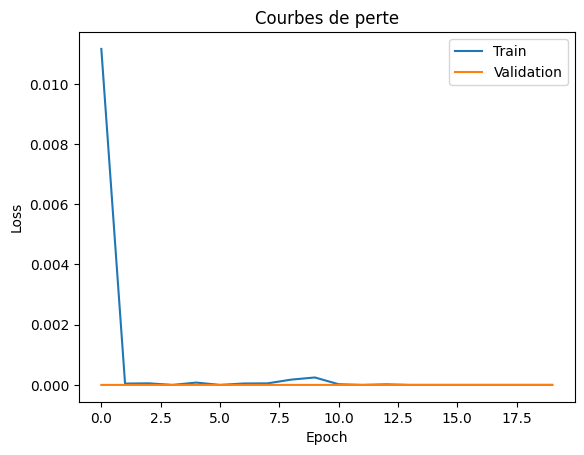

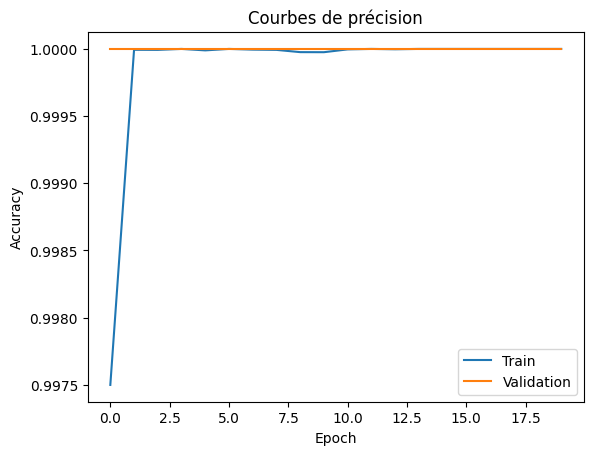

In [15]:
database = election.merge(education, how="inner", on ="code departement")
database = database.merge(sante, how ="inner", on ="code departement")
database=database.dropna()
# Separation des donnees en Train X et test y
# Split the data into X and y
y = database.pop("Nom")
X = database

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
# Transformation de la target
from sklearn.preprocessing import LabelEncoder

# Normalisation des données
scaler = MinMaxScaler()
X_normalized= scaler.fit_transform(X)

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Dense, Dropout


# Encoder les étiquettes en valeurs numériques
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

X_train, X_test, y_train, y_test = train_test_split(X_normalized,y_encoded , test_size=0.2, random_state=42,)


# Créer le modèle MLP
model = Sequential()
model.add(Dense(100, activation='tanh', input_shape=(X.shape[1],)))

model.add(Dense(100, activation='tanh'))

model.add(Dense(100, activation='tanh'))

model.add(Dense(num_classes, activation='softmax'))

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convertir les étiquettes en vecteurs binaires catégoriques
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Entraîner le modèle sur les données d'entraînement
history=model.fit(X_train, y_train_categorical, epochs=20, batch_size=128, validation_data=(X_test, y_test_categorical))

# Évaluer le modèle sur les données de test
loss, accuracy4 = model.evaluate(X_test, y_test_categorical)

print("Accuracy:: {:.2f}%".format(accuracy4 * 100))
import matplotlib.pyplot as plt

# Courbes de perte
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Courbes de perte')
plt.show()

# Courbes de précision
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbes de précision')
plt.show()

In [13]:

# Compiler le modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Convertir les étiquettes en vecteurs binaires catégoriques
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Entraîner le modèle sur les données d'entraînement
history=model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test))

# Évaluer le modèle sur les données de test
loss, accuracy4 = model.evaluate(X_test, y_test)

print("Accuracy:: {:.2f}%".format(accuracy4 * 100))
import matplotlib.pyplot as plt

# Courbes de perte
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Courbes de perte')
plt.show()

# Courbes de précision
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Courbes de précision')
plt.show()

NameError: ignored